<a href="https://colab.research.google.com/github/BenStanley13/MAT421/blob/main/DAT421HWB_2(17.4%2C17.5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17.4: Lagrange Polynomial Interpolation

Langrange Polynomial Interpolation creates a single polynomial that passes through all the points in the data set.

Example: Find the Lagrange basis polynomials for the data set x = [1, 2, 3, 4, 5] and y = [3, 2, 5, 7, 3]. Plot each polynomial and verify that Pi(xj) = 1 when i = j and Pi(xj) = 0 when i =/ j.

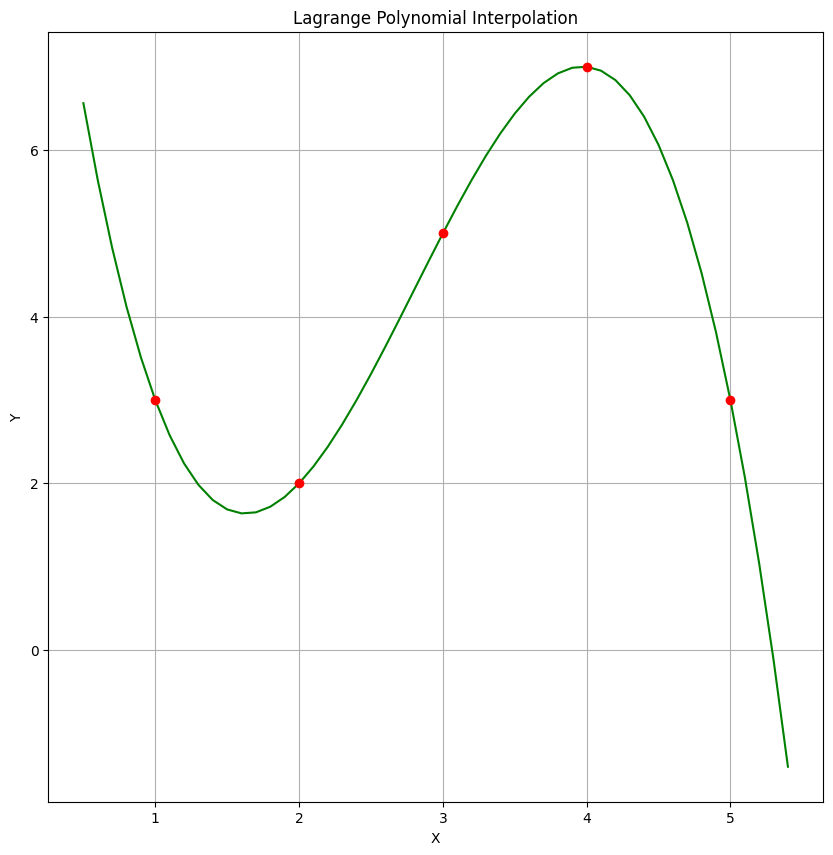

In [2]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
x = [1, 2, 3, 4, 5]
y = [3, 2, 5, 7, 3]
x_new = np.arange(0.5, 5.5, 0.1)
f = lagrange(x, y) #By using the lagrange function of scipy, we can find a single function that interpolates across the whole dataset
fig = plt.figure(figsize = (10,10))
plt.plot(x_new, f(x_new), 'g', x, y, 'ro')
plt.title('Lagrange Polynomial Interpolation')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 17.5: Newton’s Polynomial Interpolation

Newton's Polynomial Interpolation is another popular way to interpolate a single polynomial that goes through all points in a data set.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def divided_diff(x, y):
      n = len(y)
      coef = np.zeros([n, n])
      coef[:,0] = y
      for j in range(1,n):
          for i in range(n-j):
              coef[i][j] = \
              (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
      return coef
def newton_poly(coef, x_data, x):
      n = len(x_data) - 1
      p = coef[n]
      for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
      return p

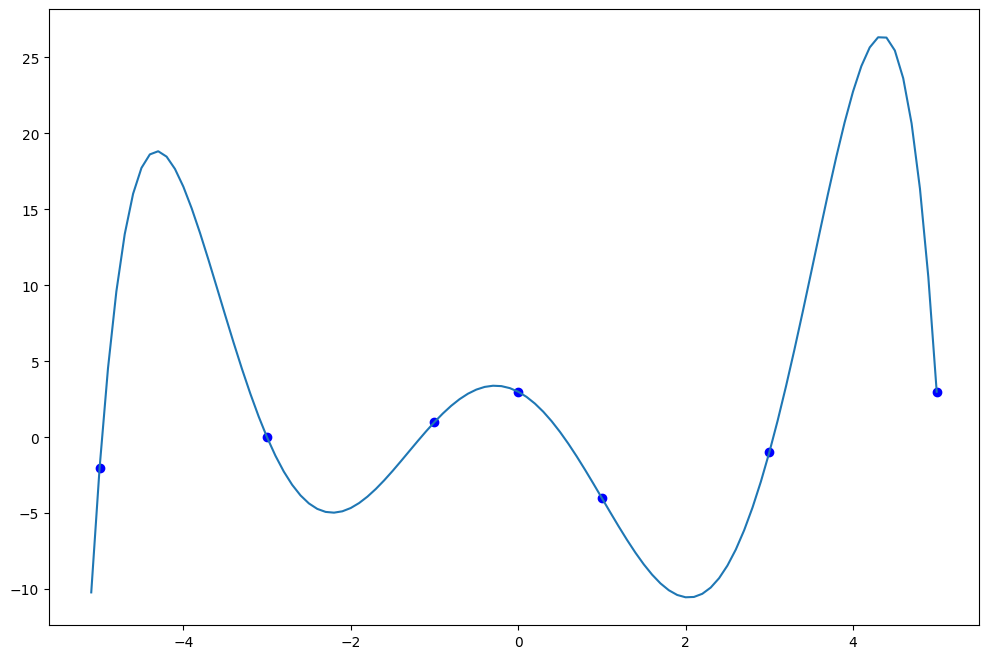

In [5]:
x = np.array([-5, -3, -1, 0, 1, 3, 5])
y = np.array([-2, 0, 1, 3, -4, -1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]
# evaluate on new data points
x_new = np.arange(-5.1, 5.1, .1)
y_new = newton_poly(a_s, x, x_new)
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)